<a href="https://colab.research.google.com/github/Tsubaki224/API/blob/main/%E3%82%B0%E3%83%A9%E3%83%95%E3%83%97%E3%83%AD%E3%83%83%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
CSVファイルから「いいね数」「コメント数」「投稿日時」の3つの列を読み込み、投稿日時を横軸、いいね数とコメント数を縦軸にしてグラフをプロットしてください。

## データの読み込み

### Subtask:
CSVファイルをpandas DataFrameに読み込みます。


**Reasoning**:
Import pandas and load the CSV file into a DataFrame, then display the head of the DataFrame.



**Reasoning**:
The previous attempt failed because the file was not found. I need to use the correct file path, which is provided in the new context.



**Reasoning**:
The previous attempts to load the CSV file failed because the file path was incorrect. I will try reading the file from the path provided in the user's request.



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

# Replace '/content/drive/My Drive/Your_Folder/your_file.csv' with the actual path to your CSV file in Google Drive
try:
  df = pd.read_csv('/content/drive/MyDrive/chinami_okayama_trip_instagram_posts.csv')
  display(df.head())
except FileNotFoundError:
  print("Error: The file was not found. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")

,id,caption,media_url,timestamp,like_count,comments_count,media_type
0,18055087790609935,詳細↓↓\nジブリすぎる森のパン屋さん🥐🌳\n____________________\n《...,https://scontent-ord5-1.cdninstagram.com/o1/v/...,2025-07-09T10:05:46+0000,2287.0,17,VIDEO
1,17899933884101772,詳細↓↓\nお洒落すぎるビアガーデン🌻🍻\n____________________\n《店...,https://scontent-ord5-2.cdninstagram.com/o1/v/...,2025-06-30T09:30:36+0000,1204.0,7,VIDEO
2,18048513719386848,詳細↓↓\n神社の境内にあるお洒落カフェ☕️🍰\n____________________\...,https://scontent-ord5-1.cdninstagram.com/o1/v/...,2025-06-25T10:03:38+0000,3255.0,12,VIDEO
3,18139023535406993,詳細↓↓\nお洒落カフェで身体が喜ぶ定食🍽️\n____________________\n...,https://scontent-ord5-3.cdninstagram.com/o1/v/...,2025-06-21T11:37:53+0000,1730.0,3,VIDEO
4,18333310117163420,詳細↓↓\nお花畑に囲まれたテラスカフェでかき氷🍧\n___________________...,https://scontent-ord5-1.cdninstagram.com/o1/v/...,2025-06-17T09:26:25+0000,2868.0,11,VIDEO


## データの準備

### Subtask:
グラフにプロットするための必要な列（いいね数、コメント数、投稿日時）を選択し、投稿日時を適切な形式に変換します。

In [7]:
# Select the relevant columns
df_selected = df[['timestamp', 'like_count', 'comments_count']].copy()

# Convert 'timestamp' column to datetime objects
df_selected['timestamp'] = pd.to_datetime(df_selected['timestamp'])

# Display the first few rows of the prepared data
display(df_selected.head())

,timestamp,like_count,comments_count
0,2025-07-09 10:05:46+00:00,2287.0,17
1,2025-06-30 09:30:36+00:00,1204.0,7
2,2025-06-25 10:03:38+00:00,3255.0,12
3,2025-06-21 11:37:53+00:00,1730.0,3
4,2025-06-17 09:26:25+00:00,2868.0,11


## データの準備（修正）

### Subtask:
投稿日時を投稿からの経過日数に変換する列を追加します。

In [8]:
# Find the earliest timestamp
earliest_timestamp = df_selected['timestamp'].min()

# Calculate elapsed days from the earliest timestamp
df_selected['elapsed_days'] = (df_selected['timestamp'] - earliest_timestamp).dt.days

# Display the first few rows with the new column
display(df_selected.head())

,timestamp,like_count,comments_count,elapsed_days
0,2025-07-09 10:05:46+00:00,2287.0,17,629
1,2025-06-30 09:30:36+00:00,1204.0,7,620
2,2025-06-25 10:03:38+00:00,3255.0,12,615
3,2025-06-21 11:37:53+00:00,1730.0,3,612
4,2025-06-17 09:26:25+00:00,2868.0,11,607


## データの可視化（修正）

### Subtask:
経過日数を横軸に、いいね数とコメント数を縦軸にしてグラフをプロットします。

/tmp/ipython-input-15-1034898350.py:17: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1034898350.py:17: UserWarning: Glyph 31295 (\N{CJK UNIFIED IDEOGRAPH-7A3F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1034898350.py:17: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1034898350.py:17: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1034898350.py:17: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1034898350.py:17: UserWarning: Glyph 32076 (\N{CJK UNIFIED IDEOGRAPH-7D4C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1034898350.py:17: UserWarning: Glyph 36942 (\N{CJK UNIFIED IDEOGRAPH-904E}) missing 

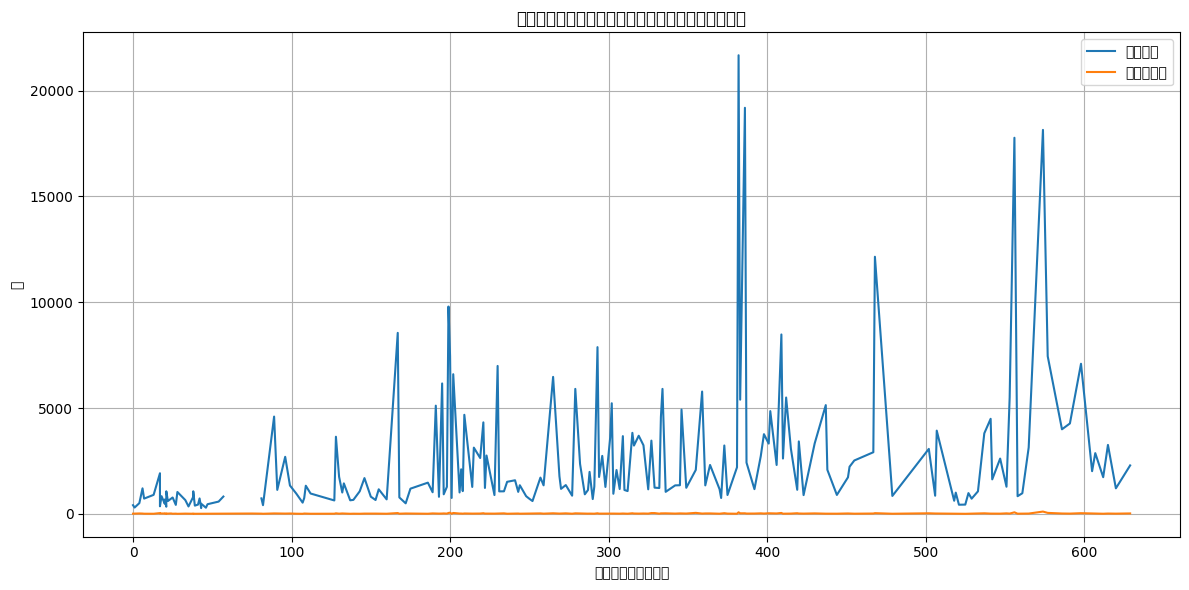

In [15]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

plt.plot(df_selected['elapsed_days'], df_selected['like_count'], label='いいね数')
plt.plot(df_selected['elapsed_days'], df_selected['comments_count'], label='コメント数')

# Add labels and title
plt.xlabel('投稿からの経過日数')
plt.ylabel('数')
plt.title('投稿からの経過日数といいね数・コメント数の関係')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

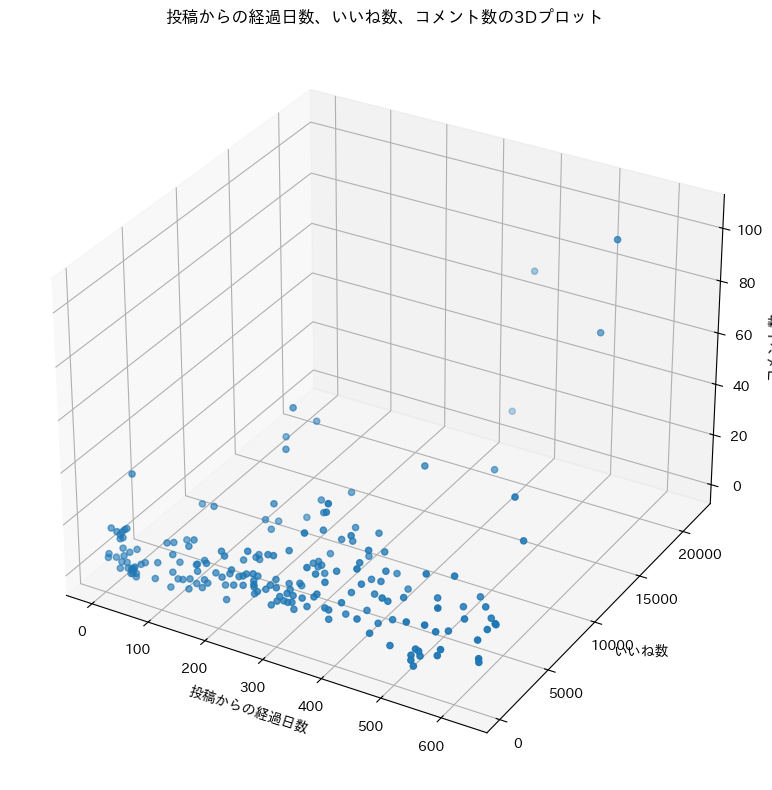

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import japanize_matplotlib # Import japanize_matplotlib

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df_selected['elapsed_days'], df_selected['like_count'], df_selected['comments_count'])

# Set labels for each axis
ax.set_xlabel('投稿からの経過日数')
ax.set_ylabel('いいね数')
ax.set_zlabel('コメント数')
ax.set_title('投稿からの経過日数、いいね数、コメント数の3Dプロット')

# Show the plot
plt.tight_layout()
plt.show()